<a href="https://colab.research.google.com/github/jogabenn/Advanced-Machine-Learning-Methods-Activities/blob/main/Activity2c/TC4033_Activity2c_ID4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

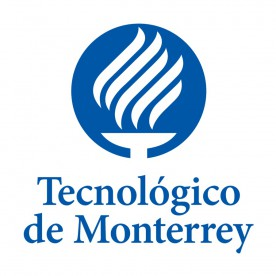

# **Masters in Applied Artificial Intelligence**
#### **Course TC5033: Advanced Machine Learning Methods**
#### Tecnológico de Monterrey
#### José Antonio Cantoral Ceballos, Ph.D.<br><br>
### **Activity 2c: Exploring Transfer Learning with CIFAR-10**

**Group 4:**

- **Victor Alejandro Regueira Romero | A01794404 ​**
- **Fernando Maytorena Espinosa de los Monteros | A01110946​**
- **Alejandra Ramírez Romano | A01793144**
- **Jonathan Garza Bennet | A01793038​**<br><br>  
---

### **Objective:**
  In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
### **Instructions:**
   This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

   - **Study the Provided Code:** The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

   - **Select Two Other Pre-trained Models:** Choose two different pre-trained models available in PyTorch's model zoo.

   - **Apply Transfer Learning:** Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

   - **Evaluation:** After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

   - **Documentation:** In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

### **Note:**

   Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.
<br>

In [ ]:
# Import all the required packages and libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models
import matplotlib.pyplot as plt
from rich import print
import copy
import torch.optim as optim

### **Load dataset**

In [ ]:
# Load CIFAR-10 dataset
# Define paths, and minibatch size
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/cifar-10/cifar-10-batches-py'
DATA_PATH = '/home/pepe/Documents/github_repos/datasets/cifar-10-batches-py'
NUM_TRAIN = 45000
MINIBATCH_SIZE = 64

# Define transformations for the images
# The first transformation is typically used for pretrained models trained on ImageNet
# The second is normalized with CIFAR-10 specific values
transform_imagenet = T.Compose([
                T.Resize(224),                                                # Resize images to the size expected by pretrained models
                T.ToTensor(),                                                 # Convert image to PyTorch tensor
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))     # Normalize with ImageNet mean and std
            ])

transform_cifar = T.Compose([
                T.ToTensor(),                                                 # Convert image to PyTorch tensor
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])     # Normalize with CIFAR-10 mean and std
            ])

# Load training datasets with the ImageNet transformation
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transform_imagenet)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Load validation datasets with the ImageNet transformation
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Load testing datasets with the ImageNet transformation
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

100%|██████████| 170498071/170498071 [00:05<00:00, 30271556.10it/s]


Extracting /home/pepe/Documents/github_repos/datasets/cifar-10-batches-py/cifar-10-python.tar.gz to /home/pepe/Documents/github_repos/datasets/cifar-10-batches-py
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Quick check on the data shape
for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

0
torch.Size([64, 3, 224, 224])
torch.Size([64])

1
torch.Size([64, 3, 224, 224])
torch.Size([64])

2
torch.Size([64, 3, 224, 224])
torch.Size([64])

3
torch.Size([64, 3, 224, 224])
torch.Size([64])

4
torch.Size([64, 3, 224, 224])
torch.Size([64])

5
torch.Size([64, 3, 224, 224])
torch.Size([64])

6
torch.Size([64, 3, 224, 224])
torch.Size([64])

7
torch.Size([64, 3, 224, 224])
torch.Size([64])

8
torch.Size([64, 3, 224, 224])
torch.Size([64])

9
torch.Size([64, 3, 224, 224])
torch.Size([64])

10
torch.Size([64, 3, 224, 224])
torch.Size([64])

11
torch.Size([64, 3, 224, 224])
torch.Size([64])

12
torch.Size([64, 3, 224, 224])
torch.Size([64])

13
torch.Size([64, 3, 224, 224])
torch.Size([64])

14
torch.Size([64, 3, 224, 224])
torch.Size([64])

15
torch.Size([64, 3, 224, 224])
torch.Size([64])

16
torch.Size([64, 3, 224, 224])
torch.Size([64])

17
torch.Size([64, 3, 224, 224])
torch.Size([64])

18
torch.Size([64, 3, 224, 224])
torch.Size([64])

19
torch.Size([64, 3, 224, 224])
torch.Size([64])

20
torch.Size([64, 3, 224, 224])
torch.Size([64])

21
torch.Size([64, 3, 224, 224])
torch.Size([64])

22
torch.Size([64, 3, 224, 224])
torch.Size([64])

23
torch.Size([64, 3, 224, 224])
torch.Size([64])

24
torch.Size([64, 3, 224, 224])
torch.Size([64])

25
torch.Size([64, 3, 224, 224])
torch.Size([64])

26
torch.Size([64, 3, 224, 224])
torch.Size([64])

27
torch.Size([64, 3, 224, 224])
torch.Size([64])

28
torch.Size([64, 3, 224, 224])
torch.Size([64])

29
torch.Size([64, 3, 224, 224])
torch.Size([64])

30
torch.Size([64, 3, 224, 224])
torch.Size([64])

31
torch.Size([64, 3, 224, 224])
torch.Size([64])

32
torch.Size([64, 3, 224, 224])
torch.Size([64])

33
torch.Size([64, 3, 224, 224])
torch.Size([64])

34
torch.Size([64, 3, 224, 224])
torch.Size([64])

35
torch.Size([64, 3, 224, 224])
torch.Size([64])

36
torch.Size([64, 3, 224, 224])
torch.Size([64])

37
torch.Size([64, 3, 224, 224])
torch.Size([64])

38
torch.Size([64, 3, 224, 224])
torch.Size([64])

39
torch.Size([64, 3, 224, 224])
torch.Size([64])

40
torch.Size([64, 3, 224, 224])
torch.Size([64])

41
torch.Size([64, 3, 224, 224])
torch.Size([64])

42
torch.Size([64, 3, 224, 224])
torch.Size([64])

43
torch.Size([64, 3, 224, 224])
torch.Size([64])

44
torch.Size([64, 3, 224, 224])
torch.Size([64])

45
torch.Size([64, 3, 224, 224])
torch.Size([64])

46
torch.Size([64, 3, 224, 224])
torch.Size([64])

47
torch.Size([64, 3, 224, 224])
torch.Size([64])

48
torch.Size([64, 3, 224, 224])
torch.Size([64])

49
torch.Size([64, 3, 224, 224])
torch.Size([64])

50
torch.Size([64, 3, 224, 224])
torch.Size([64])

51
torch.Size([64, 3, 224, 224])
torch.Size([64])

52
torch.Size([64, 3, 224, 224])
torch.Size([64])

53
torch.Size([64, 3, 224, 224])
torch.Size([64])

54
torch.Size([64, 3, 224, 224])
torch.Size([64])

55
torch.Size([64, 3, 224, 224])
torch.Size([64])

56
torch.Size([64, 3, 224, 224])
torch.Size([64])

57
torch.Size([64, 3, 224, 224])
torch.Size([64])

58
torch.Size([64, 3, 224, 224])
torch.Size([64])

59
torch.Size([64, 3, 224, 224])
torch.Size([64])

60
torch.Size([64, 3, 224, 224])
torch.Size([64])

61
torch.Size([64, 3, 224, 224])
torch.Size([64])

62
torch.Size([64, 3, 224, 224])
torch.Size([64])

63
torch.Size([64, 3, 224, 224])
torch.Size([64])

64
torch.Size([64, 3, 224, 224])
torch.Size([64])

65
torch.Size([64, 3, 224, 224])
torch.Size([64])

66
torch.Size([64, 3, 224, 224])
torch.Size([64])

67
torch.Size([64, 3, 224, 224])
torch.Size([64])

68
torch.Size([64, 3, 224, 224])
torch.Size([64])

69
torch.Size([64, 3, 224, 224])
torch.Size([64])

70
torch.Size([64, 3, 224, 224])
torch.Size([64])

71
torch.Size([64, 3, 224, 224])
torch.Size([64])

72
torch.Size([64, 3, 224, 224])
torch.Size([64])

73
torch.Size([64, 3, 224, 224])
torch.Size([64])

74
torch.Size([64, 3, 224, 224])
torch.Size([64])

75
torch.Size([64, 3, 224, 224])
torch.Size([64])

76
torch.Size([64, 3, 224, 224])
torch.Size([64])

77
torch.Size([64, 3, 224, 224])
torch.Size([64])

78
torch.Size([8, 3, 224, 224])
torch.Size([8])

### **Use GPU**

In [ ]:
# Choose device - use GPU if available, else CPU
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda

### **Display images**

The displayed image represents a: Car

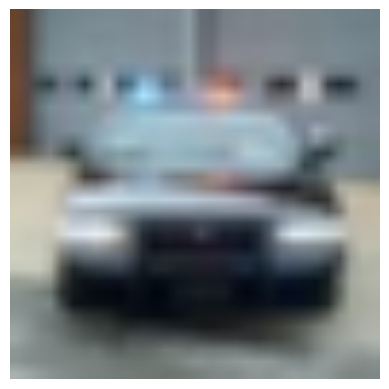

In [ ]:
# Define classes in CIFAR-10 for reference
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to visualize an image using matplotlib
def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

# Randomly select an image from the test set, normalize it, and display it with its label
rnd_sample_idx = np.random.randint(len(test_loader))
print(f'The displayed image represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

### **Accuracy function**

In [ ]:
# Function to calculate accuracy of model predictions
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi)
            _, pred = scores.max(dim=1)
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)
        return float(num_correct)/num_total

## **ResNet-18 model on CIFAR-10**

In [ ]:
# Load pre-trained ResNet-18 model
model_resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### **Let's explore the model**

In [ ]:
# Explore the model - see layers and whether their weights are trainable (requires_grad)
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0
torch.Size([64, 3, 7, 7])
True

1
torch.Size([64])
True

2
torch.Size([64])
True

3
torch.Size([64, 64, 3, 3])
True

4
torch.Size([64])
True

5
torch.Size([64])
True

6
torch.Size([64, 64, 3, 3])
True

7
torch.Size([64])
True

8
torch.Size([64])
True

9
torch.Size([64, 64, 3, 3])
True

10
torch.Size([64])
True

11
torch.Size([64])
True

12
torch.Size([64, 64, 3, 3])
True

13
torch.Size([64])
True

14
torch.Size([64])
True

15
torch.Size([128, 64, 3, 3])
True

16
torch.Size([128])
True

17
torch.Size([128])
True

18
torch.Size([128, 128, 3, 3])
True

19
torch.Size([128])
True

20
torch.Size([128])
True

21
torch.Size([128, 64, 1, 1])
True

22
torch.Size([128])
True

23
torch.Size([128])
True

24
torch.Size([128, 128, 3, 3])
True

25
torch.Size([128])
True

26
torch.Size([128])
True

27
torch.Size([128, 128, 3, 3])
True

28
torch.Size([128])
True

29
torch.Size([128])
True

30
torch.Size([256, 128, 3, 3])
True

31
torch.Size([256])
True

32
torch.Size([256])
True

33
torch.Size([256, 256, 3, 3])
True

34
torch.Size([256])
True

35
torch.Size([256])
True

36
torch.Size([256, 128, 1, 1])
True

37
torch.Size([256])
True

38
torch.Size([256])
True

39
torch.Size([256, 256, 3, 3])
True

40
torch.Size([256])
True

41
torch.Size([256])
True

42
torch.Size([256, 256, 3, 3])
True

43
torch.Size([256])
True

44
torch.Size([256])
True

45
torch.Size([512, 256, 3, 3])
True

46
torch.Size([512])
True

47
torch.Size([512])
True

48
torch.Size([512, 512, 3, 3])
True

49
torch.Size([512])
True

50
torch.Size([512])
True

51
torch.Size([512, 256, 1, 1])
True

52
torch.Size([512])
True

53
torch.Size([512])
True

54
torch.Size([512, 512, 3, 3])
True

55
torch.Size([512])
True

56
torch.Size([512])
True

57
torch.Size([512, 512, 3, 3])
True

58
torch.Size([512])
True

59
torch.Size([512])
True

60
torch.Size([1000, 512])
True

61
torch.Size([1000])
True

In [ ]:
print(model_resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer3): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(128, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): 

#### **Adjust pre-trained model**

In [ ]:
# Adjust the pre-trained model for our use-case
# Remove the final layer (classification layer of ResNet18)
model_aux = nn.Sequential(*list(model_resnet18.children()))
print(model_aux)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (5): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (6): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(128, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (7): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, mom

In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

In [ ]:
print(model_aux)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (5): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (6): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(128, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (7): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, mom

In [ ]:
# Freeze the weights of the model to prevent them from being updated during training
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

0 False

1 False

2 False

3 False

4 False

5 False

6 False

7 False

8 False

9 False

10 False

11 False

12 False

13 False

14 False

15 False

16 False

17 False

18 False

19 False

20 False

21 False

22 False

23 False

24 False

25 False

26 False

27 False

28 False

29 False

30 False

31 False

32 False

33 False

34 False

35 False

36 False

37 False

38 False

39 False

40 False

41 False

42 False

43 False

44 False

45 False

46 False

47 False

48 False

49 False

50 False

51 False

52 False

53 False

54 False

55 False

56 False

57 False

58 False

59 False

#### **Training loop**

In [ ]:
# Define the training loop
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input= scores, target=yi)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

        acc = accuracy(model, val_loader)
#         if epoch%5 == 0:
        print(f'Epoch: {epoch}, cost: {cost.item()}, accuracy: {acc},')
#         scheduler.step()

In [ ]:
# Define the final model architecture
# We use the adjusted pre-trained model and add a final classification layer with 10 outputs (for CIFAR-10)
model1 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=512, out_features= 10, bias= True))

# Set hyperparameters and optimizer
hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 3
optimiser1 = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
# Train the model and evaluate it
train(model1, optimiser1a, epochs)

Epoch: 0, cost: 2.637755870819092, accuracy: 0.0952,

Epoch: 1, cost: 2.775270700454712, accuracy: 0.0958,

Epoch: 2, cost: 2.5450997352600098, accuracy: 0.0936,

In [ ]:
accuracy(model1, test_loader)

0.0917

#### **Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate_model(model, loader):
    """
    Evaluate the model on accuracy, loss, and other metrics.

    Args:
    - model (torch.nn.Module): The model to be evaluated.
    - loader (torch.utils.data.DataLoader): DataLoader for the evaluation dataset.

    Returns:
    - dict: A dictionary containing various performance metrics.
    """
    model.eval()
    model.to(device)
    all_preds = []
    all_labels = []
    total_loss = 0

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = F.cross_entropy(outputs, y)
            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(y.cpu().numpy())

    avg_loss = total_loss / len(loader)
    acc = accuracy(model, loader)
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    class_report = classification_report(all_labels, all_preds, target_names=classes, output_dict=True)

    metrics = {
        'loss': avg_loss,
        'accuracy': acc,
        'classification_report': class_report,
    }
    return metrics, all_labels, all_preds

def plot_confusion_matrix(labels, predictions, class_names):
    """
    Plot a confusion matrix using seaborn.

    Args:
    - labels (array): Array of true class labels.
    - predictions (array): Array of predicted class labels.
    - class_names (list): List containing names of classes.
    """
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def visualize_predictions(model, loader, class_names, num_images=5):
    """
    Display images along with their predicted and true labels.

    Args:
    - model (torch.nn.Module): Model to be used for prediction.
    - loader (torch.utils.data.DataLoader): DataLoader for the dataset.
    - class_names (list): List containing names of classes.
    - num_images (int, optional): Number of images to display. Default is 5.
    """
    model.eval()
    model.to(device)
    images_so_far = 0
    fig = plt.figure(figsize=(15, 5))

    with torch.no_grad():
        for i, (x, y) in enumerate(loader):
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            _, preds = torch.max(outputs, 1)

            for j in range(x.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//5, 5, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}, true: {class_names[y[j]]}')
                image = x.cpu().data[j].numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                image = std * image + mean
                image = np.clip(image, 0, 1)
                plt.imshow(image)

                if images_so_far == num_images:
                    return

Loss: 2.5137

Accuracy: 0.0917

Classification Report:

{
    'Plane': {
        'precision': 0.020491803278688523,
        'recall': 0.005,
        'f1-score': 0.008038585209003215,
        'support': 1000
    },
    'Car': {'precision': 0.08752327746741155, 'recall': 0.094, 'f1-score': 0.09064609450337514, 'support': 1000},
    'Bird': {
        'precision': 0.019406392694063926,
        'recall': 0.017,
        'f1-score': 0.018123667377398723,
        'support': 1000
    },
    'Cat': {'precision': 0.2, 'recall': 0.002, 'f1-score': 0.0039603960396039604, 'support': 1000},
    'Deer': {'precision': 0.11866540761724897, 'recall': 0.377, 'f1-score': 0.1805123294230309, 'support': 1000},
    'Dog': {'precision': 0.09030347890451518, 'recall': 0.366, 'f1-score': 0.14486443696813772, 'support': 1000},
    'Frog': {'precision': 0.1875, 'recall': 0.003, 'f1-score': 0.005905511811023623, 'support': 1000},
    'Horse': {
        'precision': 0.10515463917525773,
        'recall': 0.051,
        'f1-score': 0.06868686868686869,
        'support': 1000
    },
    'Ship': {
        'precision': 0.044444444444444446,
        'recall': 0.002,
        'f1-score': 0.003827751196172249,
        'support': 1000
    },
    'Truck': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1000},
    'accuracy': 0.0917,
    'macro avg': {
        'precision': 0.08734894435816301,
        'recall': 0.0917,
        'f1-score': 0.05245656412146142,
        'support': 10000
    },
    'weighted avg': {
        'precision': 0.08734894435816304,
        'recall': 0.0917,
        'f1-score': 0.052456564121461415,
        'support': 10000
    }
}

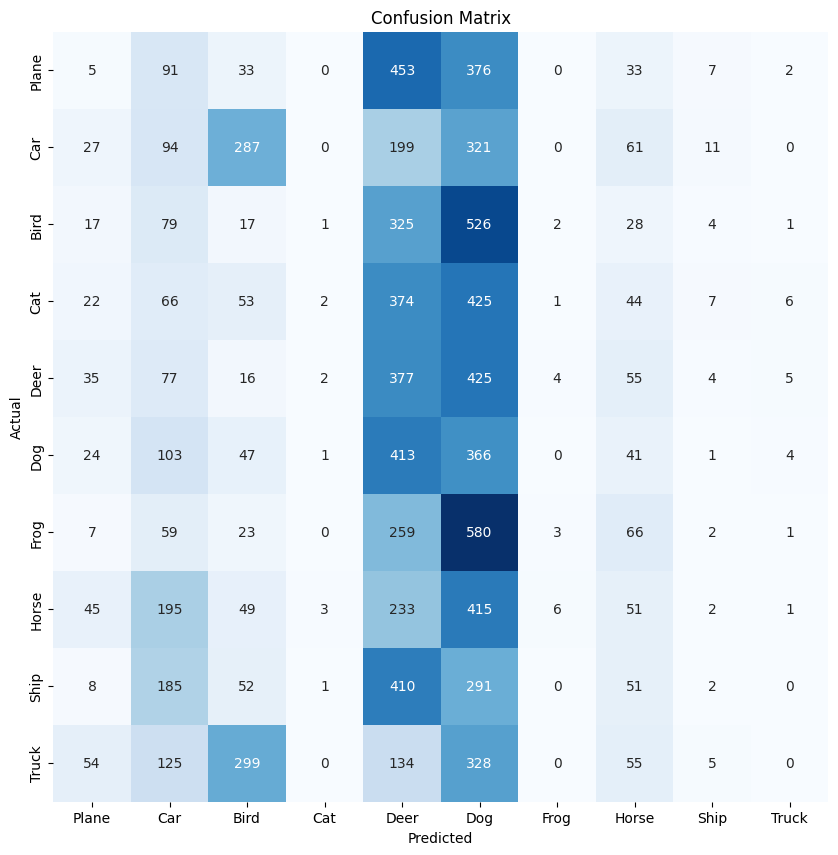

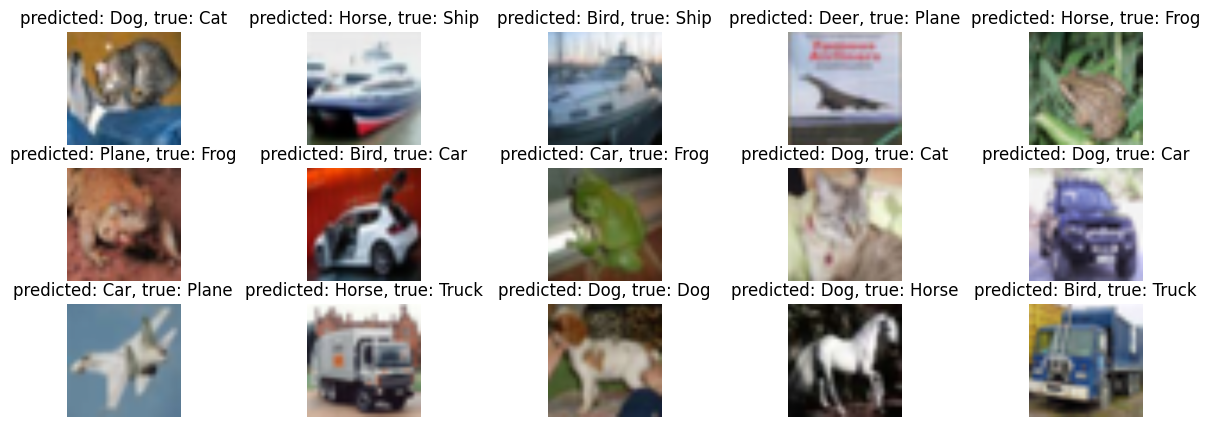

In [ ]:
# Evaluate the model
metrics, all_labels, all_preds = evaluate_model(model1, test_loader)

# Display the metrics
print(f"Loss: {metrics['loss']:.4f}")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print("\nClassification Report:")
print(metrics['classification_report'])

# Plot the confusion matrix
plot_confusion_matrix(all_labels, all_preds, classes)

# Visualize some predictions
visualize_predictions(model1, test_loader, classes, num_images=15)

<br>

#### **Summary**

<p align ="justify">

**Process & Implementation:**
Initially, the provided code was studied to understand the approach taken for transfer learning using ResNet-18.
Pre-trained ResNet-18 model was loaded, and its final layers were adjusted to cater to the CIFAR-10 dataset, which has 10 classes.
A training loop was established to fine-tune the model for the new task.

**Challenges:**
Ensuring that the final layers were compatible with the CIFAR-10 task while leveraging the pre-trained weights for feature extraction. Also, while the accuracy function is a qualitaty objective measure, being able to visualize results provide more insights, which is why we decided to add a confusion matrix to better understand results.

**Insights:**
Leveraging pre-trained models significantly accelerates convergence and can yield robust feature extractors even for datasets that are quite distinct from the ones they were originally trained on.
</p>

## **DenseNet-121 model on CIFAR-10 dataset**

#### **Load and explore pre-trained model**

In [ ]:
# Load pre-trained DenseNet-121 model + higher level layers
model_densenet = models.densenet121(pretrained=True)

# Create a deep copy of the loaded DenseNet-121 model, the copy will be adjusted for our use case
model_densenet_copy = copy.deepcopy(model_densenet)

# We explore the loaded DenseNet-121 model
print(model_densenet)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 146MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer3): _DenseLayer(
        (norm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer4): _DenseLayer(
        (norm1): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(160, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer5): _DenseLayer(
        (norm1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer6): _DenseLayer(
        (norm1): BatchNorm2d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(224, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
    )
    (transition1): _Transition(
      (norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    )
    (denseblock2): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(

#### **Adjust pre-trained model**

In [ ]:
# Freeze the DenseNet convolutional layers
for param in model_densenet_copy.features.parameters():
    param.requires_grad = False

In [ ]:
# Explore the loaded DenseNet-121 model -- We observe each layer has 'True' for 'requires_grad', meaning they are trainable.
for i, w in enumerate(model_densenet.parameters()):
    print(i, w.shape, w.requires_grad)

0
torch.Size([64, 3, 7, 7])
True

1
torch.Size([64])
True

2
torch.Size([64])
True

3
torch.Size([64])
True

4
torch.Size([64])
True

5
torch.Size([128, 64, 1, 1])
True

6
torch.Size([128])
True

7
torch.Size([128])
True

8
torch.Size([32, 128, 3, 3])
True

9
torch.Size([96])
True

10
torch.Size([96])
True

11
torch.Size([128, 96, 1, 1])
True

12
torch.Size([128])
True

13
torch.Size([128])
True

14
torch.Size([32, 128, 3, 3])
True

15
torch.Size([128])
True

16
torch.Size([128])
True

17
torch.Size([128, 128, 1, 1])
True

18
torch.Size([128])
True

19
torch.Size([128])
True

20
torch.Size([32, 128, 3, 3])
True

21
torch.Size([160])
True

22
torch.Size([160])
True

23
torch.Size([128, 160, 1, 1])
True

24
torch.Size([128])
True

25
torch.Size([128])
True

26
torch.Size([32, 128, 3, 3])
True

27
torch.Size([192])
True

28
torch.Size([192])
True

29
torch.Size([128, 192, 1, 1])
True

30
torch.Size([128])
True

31
torch.Size([128])
True

32
torch.Size([32, 128, 3, 3])
True

33
torch.Size([224])
True

34
torch.Size([224])
True

35
torch.Size([128, 224, 1, 1])
True

36
torch.Size([128])
True

37
torch.Size([128])
True

38
torch.Size([32, 128, 3, 3])
True

39
torch.Size([256])
True

40
torch.Size([256])
True

41
torch.Size([128, 256, 1, 1])
True

42
torch.Size([128])
True

43
torch.Size([128])
True

44
torch.Size([128, 128, 1, 1])
True

45
torch.Size([128])
True

46
torch.Size([128])
True

47
torch.Size([32, 128, 3, 3])
True

48
torch.Size([160])
True

49
torch.Size([160])
True

50
torch.Size([128, 160, 1, 1])
True

51
torch.Size([128])
True

52
torch.Size([128])
True

53
torch.Size([32, 128, 3, 3])
True

54
torch.Size([192])
True

55
torch.Size([192])
True

56
torch.Size([128, 192, 1, 1])
True

57
torch.Size([128])
True

58
torch.Size([128])
True

59
torch.Size([32, 128, 3, 3])
True

60
torch.Size([224])
True

61
torch.Size([224])
True

62
torch.Size([128, 224, 1, 1])
True

63
torch.Size([128])
True

64
torch.Size([128])
True

65
torch.Size([32, 128, 3, 3])
True

66
torch.Size([256])
True

67
torch.Size([256])
True

68
torch.Size([128, 256, 1, 1])
True

69
torch.Size([128])
True

70
torch.Size([128])
True

71
torch.Size([32, 128, 3, 3])
True

72
torch.Size([288])
True

73
torch.Size([288])
True

74
torch.Size([128, 288, 1, 1])
True

75
torch.Size([128])
True

76
torch.Size([128])
True

77
torch.Size([32, 128, 3, 3])
True

78
torch.Size([320])
True

79
torch.Size([320])
True

80
torch.Size([128, 320, 1, 1])
True

81
torch.Size([128])
True

82
torch.Size([128])
True

83
torch.Size([32, 128, 3, 3])
True

84
torch.Size([352])
True

85
torch.Size([352])
True

86
torch.Size([128, 352, 1, 1])
True

87
torch.Size([128])
True

88
torch.Size([128])
True

89
torch.Size([32, 128, 3, 3])
True

90
torch.Size([384])
True

91
torch.Size([384])
True

92
torch.Size([128, 384, 1, 1])
True

93
torch.Size([128])
True

94
torch.Size([128])
True

95
torch.Size([32, 128, 3, 3])
True

96
torch.Size([416])
True

97
torch.Size([416])
True

98
torch.Size([128, 416, 1, 1])
True

99
torch.Size([128])
True

100
torch.Size([128])
True

101
torch.Size([32, 128, 3, 3])
True

102
torch.Size([448])
True

103
torch.Size([448])
True

104
torch.Size([128, 448, 1, 1])
True

105
torch.Size([128])
True

106
torch.Size([128])
True

107
torch.Size([32, 128, 3, 3])
True

108
torch.Size([480])
True

109
torch.Size([480])
True

110
torch.Size([128, 480, 1, 1])
True

111
torch.Size([128])
True

112
torch.Size([128])
True

113
torch.Size([32, 128, 3, 3])
True

114
torch.Size([512])
True

115
torch.Size([512])
True

116
torch.Size([256, 512, 1, 1])
True

117
torch.Size([256])
True

118
torch.Size([256])
True

119
torch.Size([128, 256, 1, 1])
True

120
torch.Size([128])
True

121
torch.Size([128])
True

122
torch.Size([32, 128, 3, 3])
True

123
torch.Size([288])
True

124
torch.Size([288])
True

125
torch.Size([128, 288, 1, 1])
True

126
torch.Size([128])
True

127
torch.Size([128])
True

128
torch.Size([32, 128, 3, 3])
True

129
torch.Size([320])
True

130
torch.Size([320])
True

131
torch.Size([128, 320, 1, 1])
True

132
torch.Size([128])
True

133
torch.Size([128])
True

134
torch.Size([32, 128, 3, 3])
True

135
torch.Size([352])
True

136
torch.Size([352])
True

137
torch.Size([128, 352, 1, 1])
True

138
torch.Size([128])
True

139
torch.Size([128])
True

140
torch.Size([32, 128, 3, 3])
True

141
torch.Size([384])
True

142
torch.Size([384])
True

143
torch.Size([128, 384, 1, 1])
True

144
torch.Size([128])
True

145
torch.Size([128])
True

146
torch.Size([32, 128, 3, 3])
True

147
torch.Size([416])
True

148
torch.Size([416])
True

149
torch.Size([128, 416, 1, 1])
True

150
torch.Size([128])
True

151
torch.Size([128])
True

152
torch.Size([32, 128, 3, 3])
True

153
torch.Size([448])
True

154
torch.Size([448])
True

155
torch.Size([128, 448, 1, 1])
True

156
torch.Size([128])
True

157
torch.Size([128])
True

158
torch.Size([32, 128, 3, 3])
True

159
torch.Size([480])
True

160
torch.Size([480])
True

161
torch.Size([128, 480, 1, 1])
True

162
torch.Size([128])
True

163
torch.Size([128])
True

164
torch.Size([32, 128, 3, 3])
True

165
torch.Size([512])
True

166
torch.Size([512])
True

167
torch.Size([128, 512, 1, 1])
True

168
torch.Size([128])
True

169
torch.Size([128])
True

170
torch.Size([32, 128, 3, 3])
True

171
torch.Size([544])
True

172
torch.Size([544])
True

173
torch.Size([128, 544, 1, 1])
True

174
torch.Size([128])
True

175
torch.Size([128])
True

176
torch.Size([32, 128, 3, 3])
True

177
torch.Size([576])
True

178
torch.Size([576])
True

179
torch.Size([128, 576, 1, 1])
True

180
torch.Size([128])
True

181
torch.Size([128])
True

182
torch.Size([32, 128, 3, 3])
True

183
torch.Size([608])
True

184
torch.Size([608])
True

185
torch.Size([128, 608, 1, 1])
True

186
torch.Size([128])
True

187
torch.Size([128])
True

188
torch.Size([32, 128, 3, 3])
True

189
torch.Size([640])
True

190
torch.Size([640])
True

191
torch.Size([128, 640, 1, 1])
True

192
torch.Size([128])
True

193
torch.Size([128])
True

194
torch.Size([32, 128, 3, 3])
True

195
torch.Size([672])
True

196
torch.Size([672])
True

197
torch.Size([128, 672, 1, 1])
True

198
torch.Size([128])
True

199
torch.Size([128])
True

200
torch.Size([32, 128, 3, 3])
True

201
torch.Size([704])
True

202
torch.Size([704])
True

203
torch.Size([128, 704, 1, 1])
True

204
torch.Size([128])
True

205
torch.Size([128])
True

206
torch.Size([32, 128, 3, 3])
True

207
torch.Size([736])
True

208
torch.Size([736])
True

209
torch.Size([128, 736, 1, 1])
True

210
torch.Size([128])
True

211
torch.Size([128])
True

212
torch.Size([32, 128, 3, 3])
True

213
torch.Size([768])
True

214
torch.Size([768])
True

215
torch.Size([128, 768, 1, 1])
True

216
torch.Size([128])
True

217
torch.Size([128])
True

218
torch.Size([32, 128, 3, 3])
True

219
torch.Size([800])
True

220
torch.Size([800])
True

221
torch.Size([128, 800, 1, 1])
True

222
torch.Size([128])
True

223
torch.Size([128])
True

224
torch.Size([32, 128, 3, 3])
True

225
torch.Size([832])
True

226
torch.Size([832])
True

227
torch.Size([128, 832, 1, 1])
True

228
torch.Size([128])
True

229
torch.Size([128])
True

230
torch.Size([32, 128, 3, 3])
True

231
torch.Size([864])
True

232
torch.Size([864])
True

233
torch.Size([128, 864, 1, 1])
True

234
torch.Size([128])
True

235
torch.Size([128])
True

236
torch.Size([32, 128, 3, 3])
True

237
torch.Size([896])
True

238
torch.Size([896])
True

239
torch.Size([128, 896, 1, 1])
True

240
torch.Size([128])
True

241
torch.Size([128])
True

242
torch.Size([32, 128, 3, 3])
True

243
torch.Size([928])
True

244
torch.Size([928])
True

245
torch.Size([128, 928, 1, 1])
True

246
torch.Size([128])
True

247
torch.Size([128])
True

248
torch.Size([32, 128, 3, 3])
True

249
torch.Size([960])
True

250
torch.Size([960])
True

251
torch.Size([128, 960, 1, 1])
True

252
torch.Size([128])
True

253
torch.Size([128])
True

254
torch.Size([32, 128, 3, 3])
True

255
torch.Size([992])
True

256
torch.Size([992])
True

257
torch.Size([128, 992, 1, 1])
True

258
torch.Size([128])
True

259
torch.Size([128])
True

260
torch.Size([32, 128, 3, 3])
True

261
torch.Size([1024])
True

262
torch.Size([1024])
True

263
torch.Size([512, 1024, 1, 1])
True

264
torch.Size([512])
True

265
torch.Size([512])
True

266
torch.Size([128, 512, 1, 1])
True

267
torch.Size([128])
True

268
torch.Size([128])
True

269
torch.Size([32, 128, 3, 3])
True

270
torch.Size([544])
True

271
torch.Size([544])
True

272
torch.Size([128, 544, 1, 1])
True

273
torch.Size([128])
True

274
torch.Size([128])
True

275
torch.Size([32, 128, 3, 3])
True

276
torch.Size([576])
True

277
torch.Size([576])
True

278
torch.Size([128, 576, 1, 1])
True

279
torch.Size([128])
True

280
torch.Size([128])
True

281
torch.Size([32, 128, 3, 3])
True

282
torch.Size([608])
True

283
torch.Size([608])
True

284
torch.Size([128, 608, 1, 1])
True

285
torch.Size([128])
True

286
torch.Size([128])
True

287
torch.Size([32, 128, 3, 3])
True

288
torch.Size([640])
True

289
torch.Size([640])
True

290
torch.Size([128, 640, 1, 1])
True

291
torch.Size([128])
True

292
torch.Size([128])
True

293
torch.Size([32, 128, 3, 3])
True

294
torch.Size([672])
True

295
torch.Size([672])
True

296
torch.Size([128, 672, 1, 1])
True

297
torch.Size([128])
True

298
torch.Size([128])
True

299
torch.Size([32, 128, 3, 3])
True

300
torch.Size([704])
True

301
torch.Size([704])
True

302
torch.Size([128, 704, 1, 1])
True

303
torch.Size([128])
True

304
torch.Size([128])
True

305
torch.Size([32, 128, 3, 3])
True

306
torch.Size([736])
True

307
torch.Size([736])
True

308
torch.Size([128, 736, 1, 1])
True

309
torch.Size([128])
True

310
torch.Size([128])
True

311
torch.Size([32, 128, 3, 3])
True

312
torch.Size([768])
True

313
torch.Size([768])
True

314
torch.Size([128, 768, 1, 1])
True

315
torch.Size([128])
True

316
torch.Size([128])
True

317
torch.Size([32, 128, 3, 3])
True

318
torch.Size([800])
True

319
torch.Size([800])
True

320
torch.Size([128, 800, 1, 1])
True

321
torch.Size([128])
True

322
torch.Size([128])
True

323
torch.Size([32, 128, 3, 3])
True

324
torch.Size([832])
True

325
torch.Size([832])
True

326
torch.Size([128, 832, 1, 1])
True

327
torch.Size([128])
True

328
torch.Size([128])
True

329
torch.Size([32, 128, 3, 3])
True

330
torch.Size([864])
True

331
torch.Size([864])
True

332
torch.Size([128, 864, 1, 1])
True

333
torch.Size([128])
True

334
torch.Size([128])
True

335
torch.Size([32, 128, 3, 3])
True

336
torch.Size([896])
True

337
torch.Size([896])
True

338
torch.Size([128, 896, 1, 1])
True

339
torch.Size([128])
True

340
torch.Size([128])
True

341
torch.Size([32, 128, 3, 3])
True

342
torch.Size([928])
True

343
torch.Size([928])
True

344
torch.Size([128, 928, 1, 1])
True

345
torch.Size([128])
True

346
torch.Size([128])
True

347
torch.Size([32, 128, 3, 3])
True

348
torch.Size([960])
True

349
torch.Size([960])
True

350
torch.Size([128, 960, 1, 1])
True

351
torch.Size([128])
True

352
torch.Size([128])
True

353
torch.Size([32, 128, 3, 3])
True

354
torch.Size([992])
True

355
torch.Size([992])
True

356
torch.Size([128, 992, 1, 1])
True

357
torch.Size([128])
True

358
torch.Size([128])
True

359
torch.Size([32, 128, 3, 3])
True

360
torch.Size([1024])
True

361
torch.Size([1024])
True

362
torch.Size([1000, 1024])
True

363
torch.Size([1000])
True

In [ ]:
# Explore the copy of the DenseNet-121 model -- We observe each layer has 'False' for 'requires_grad', meaning they are not trainable anymore. Only the last two layers are trainable now.
for i, w in enumerate(model_densenet_copy.parameters()):
    print(i, w.shape, w.requires_grad)

0
torch.Size([64, 3, 7, 7])
False

1
torch.Size([64])
False

2
torch.Size([64])
False

3
torch.Size([64])
False

4
torch.Size([64])
False

5
torch.Size([128, 64, 1, 1])
False

6
torch.Size([128])
False

7
torch.Size([128])
False

8
torch.Size([32, 128, 3, 3])
False

9
torch.Size([96])
False

10
torch.Size([96])
False

11
torch.Size([128, 96, 1, 1])
False

12
torch.Size([128])
False

13
torch.Size([128])
False

14
torch.Size([32, 128, 3, 3])
False

15
torch.Size([128])
False

16
torch.Size([128])
False

17
torch.Size([128, 128, 1, 1])
False

18
torch.Size([128])
False

19
torch.Size([128])
False

20
torch.Size([32, 128, 3, 3])
False

21
torch.Size([160])
False

22
torch.Size([160])
False

23
torch.Size([128, 160, 1, 1])
False

24
torch.Size([128])
False

25
torch.Size([128])
False

26
torch.Size([32, 128, 3, 3])
False

27
torch.Size([192])
False

28
torch.Size([192])
False

29
torch.Size([128, 192, 1, 1])
False

30
torch.Size([128])
False

31
torch.Size([128])
False

32
torch.Size([32, 128, 3, 3])
False

33
torch.Size([224])
False

34
torch.Size([224])
False

35
torch.Size([128, 224, 1, 1])
False

36
torch.Size([128])
False

37
torch.Size([128])
False

38
torch.Size([32, 128, 3, 3])
False

39
torch.Size([256])
False

40
torch.Size([256])
False

41
torch.Size([128, 256, 1, 1])
False

42
torch.Size([128])
False

43
torch.Size([128])
False

44
torch.Size([128, 128, 1, 1])
False

45
torch.Size([128])
False

46
torch.Size([128])
False

47
torch.Size([32, 128, 3, 3])
False

48
torch.Size([160])
False

49
torch.Size([160])
False

50
torch.Size([128, 160, 1, 1])
False

51
torch.Size([128])
False

52
torch.Size([128])
False

53
torch.Size([32, 128, 3, 3])
False

54
torch.Size([192])
False

55
torch.Size([192])
False

56
torch.Size([128, 192, 1, 1])
False

57
torch.Size([128])
False

58
torch.Size([128])
False

59
torch.Size([32, 128, 3, 3])
False

60
torch.Size([224])
False

61
torch.Size([224])
False

62
torch.Size([128, 224, 1, 1])
False

63
torch.Size([128])
False

64
torch.Size([128])
False

65
torch.Size([32, 128, 3, 3])
False

66
torch.Size([256])
False

67
torch.Size([256])
False

68
torch.Size([128, 256, 1, 1])
False

69
torch.Size([128])
False

70
torch.Size([128])
False

71
torch.Size([32, 128, 3, 3])
False

72
torch.Size([288])
False

73
torch.Size([288])
False

74
torch.Size([128, 288, 1, 1])
False

75
torch.Size([128])
False

76
torch.Size([128])
False

77
torch.Size([32, 128, 3, 3])
False

78
torch.Size([320])
False

79
torch.Size([320])
False

80
torch.Size([128, 320, 1, 1])
False

81
torch.Size([128])
False

82
torch.Size([128])
False

83
torch.Size([32, 128, 3, 3])
False

84
torch.Size([352])
False

85
torch.Size([352])
False

86
torch.Size([128, 352, 1, 1])
False

87
torch.Size([128])
False

88
torch.Size([128])
False

89
torch.Size([32, 128, 3, 3])
False

90
torch.Size([384])
False

91
torch.Size([384])
False

92
torch.Size([128, 384, 1, 1])
False

93
torch.Size([128])
False

94
torch.Size([128])
False

95
torch.Size([32, 128, 3, 3])
False

96
torch.Size([416])
False

97
torch.Size([416])
False

98
torch.Size([128, 416, 1, 1])
False

99
torch.Size([128])
False

100
torch.Size([128])
False

101
torch.Size([32, 128, 3, 3])
False

102
torch.Size([448])
False

103
torch.Size([448])
False

104
torch.Size([128, 448, 1, 1])
False

105
torch.Size([128])
False

106
torch.Size([128])
False

107
torch.Size([32, 128, 3, 3])
False

108
torch.Size([480])
False

109
torch.Size([480])
False

110
torch.Size([128, 480, 1, 1])
False

111
torch.Size([128])
False

112
torch.Size([128])
False

113
torch.Size([32, 128, 3, 3])
False

114
torch.Size([512])
False

115
torch.Size([512])
False

116
torch.Size([256, 512, 1, 1])
False

117
torch.Size([256])
False

118
torch.Size([256])
False

119
torch.Size([128, 256, 1, 1])
False

120
torch.Size([128])
False

121
torch.Size([128])
False

122
torch.Size([32, 128, 3, 3])
False

123
torch.Size([288])
False

124
torch.Size([288])
False

125
torch.Size([128, 288, 1, 1])
False

126
torch.Size([128])
False

127
torch.Size([128])
False

128
torch.Size([32, 128, 3, 3])
False

129
torch.Size([320])
False

130
torch.Size([320])
False

131
torch.Size([128, 320, 1, 1])
False

132
torch.Size([128])
False

133
torch.Size([128])
False

134
torch.Size([32, 128, 3, 3])
False

135
torch.Size([352])
False

136
torch.Size([352])
False

137
torch.Size([128, 352, 1, 1])
False

138
torch.Size([128])
False

139
torch.Size([128])
False

140
torch.Size([32, 128, 3, 3])
False

141
torch.Size([384])
False

142
torch.Size([384])
False

143
torch.Size([128, 384, 1, 1])
False

144
torch.Size([128])
False

145
torch.Size([128])
False

146
torch.Size([32, 128, 3, 3])
False

147
torch.Size([416])
False

148
torch.Size([416])
False

149
torch.Size([128, 416, 1, 1])
False

150
torch.Size([128])
False

151
torch.Size([128])
False

152
torch.Size([32, 128, 3, 3])
False

153
torch.Size([448])
False

154
torch.Size([448])
False

155
torch.Size([128, 448, 1, 1])
False

156
torch.Size([128])
False

157
torch.Size([128])
False

158
torch.Size([32, 128, 3, 3])
False

159
torch.Size([480])
False

160
torch.Size([480])
False

161
torch.Size([128, 480, 1, 1])
False

162
torch.Size([128])
False

163
torch.Size([128])
False

164
torch.Size([32, 128, 3, 3])
False

165
torch.Size([512])
False

166
torch.Size([512])
False

167
torch.Size([128, 512, 1, 1])
False

168
torch.Size([128])
False

169
torch.Size([128])
False

170
torch.Size([32, 128, 3, 3])
False

171
torch.Size([544])
False

172
torch.Size([544])
False

173
torch.Size([128, 544, 1, 1])
False

174
torch.Size([128])
False

175
torch.Size([128])
False

176
torch.Size([32, 128, 3, 3])
False

177
torch.Size([576])
False

178
torch.Size([576])
False

179
torch.Size([128, 576, 1, 1])
False

180
torch.Size([128])
False

181
torch.Size([128])
False

182
torch.Size([32, 128, 3, 3])
False

183
torch.Size([608])
False

184
torch.Size([608])
False

185
torch.Size([128, 608, 1, 1])
False

186
torch.Size([128])
False

187
torch.Size([128])
False

188
torch.Size([32, 128, 3, 3])
False

189
torch.Size([640])
False

190
torch.Size([640])
False

191
torch.Size([128, 640, 1, 1])
False

192
torch.Size([128])
False

193
torch.Size([128])
False

194
torch.Size([32, 128, 3, 3])
False

195
torch.Size([672])
False

196
torch.Size([672])
False

197
torch.Size([128, 672, 1, 1])
False

198
torch.Size([128])
False

199
torch.Size([128])
False

200
torch.Size([32, 128, 3, 3])
False

201
torch.Size([704])
False

202
torch.Size([704])
False

203
torch.Size([128, 704, 1, 1])
False

204
torch.Size([128])
False

205
torch.Size([128])
False

206
torch.Size([32, 128, 3, 3])
False

207
torch.Size([736])
False

208
torch.Size([736])
False

209
torch.Size([128, 736, 1, 1])
False

210
torch.Size([128])
False

211
torch.Size([128])
False

212
torch.Size([32, 128, 3, 3])
False

213
torch.Size([768])
False

214
torch.Size([768])
False

215
torch.Size([128, 768, 1, 1])
False

216
torch.Size([128])
False

217
torch.Size([128])
False

218
torch.Size([32, 128, 3, 3])
False

219
torch.Size([800])
False

220
torch.Size([800])
False

221
torch.Size([128, 800, 1, 1])
False

222
torch.Size([128])
False

223
torch.Size([128])
False

224
torch.Size([32, 128, 3, 3])
False

225
torch.Size([832])
False

226
torch.Size([832])
False

227
torch.Size([128, 832, 1, 1])
False

228
torch.Size([128])
False

229
torch.Size([128])
False

230
torch.Size([32, 128, 3, 3])
False

231
torch.Size([864])
False

232
torch.Size([864])
False

233
torch.Size([128, 864, 1, 1])
False

234
torch.Size([128])
False

235
torch.Size([128])
False

236
torch.Size([32, 128, 3, 3])
False

237
torch.Size([896])
False

238
torch.Size([896])
False

239
torch.Size([128, 896, 1, 1])
False

240
torch.Size([128])
False

241
torch.Size([128])
False

242
torch.Size([32, 128, 3, 3])
False

243
torch.Size([928])
False

244
torch.Size([928])
False

245
torch.Size([128, 928, 1, 1])
False

246
torch.Size([128])
False

247
torch.Size([128])
False

248
torch.Size([32, 128, 3, 3])
False

249
torch.Size([960])
False

250
torch.Size([960])
False

251
torch.Size([128, 960, 1, 1])
False

252
torch.Size([128])
False

253
torch.Size([128])
False

254
torch.Size([32, 128, 3, 3])
False

255
torch.Size([992])
False

256
torch.Size([992])
False

257
torch.Size([128, 992, 1, 1])
False

258
torch.Size([128])
False

259
torch.Size([128])
False

260
torch.Size([32, 128, 3, 3])
False

261
torch.Size([1024])
False

262
torch.Size([1024])
False

263
torch.Size([512, 1024, 1, 1])
False

264
torch.Size([512])
False

265
torch.Size([512])
False

266
torch.Size([128, 512, 1, 1])
False

267
torch.Size([128])
False

268
torch.Size([128])
False

269
torch.Size([32, 128, 3, 3])
False

270
torch.Size([544])
False

271
torch.Size([544])
False

272
torch.Size([128, 544, 1, 1])
False

273
torch.Size([128])
False

274
torch.Size([128])
False

275
torch.Size([32, 128, 3, 3])
False

276
torch.Size([576])
False

277
torch.Size([576])
False

278
torch.Size([128, 576, 1, 1])
False

279
torch.Size([128])
False

280
torch.Size([128])
False

281
torch.Size([32, 128, 3, 3])
False

282
torch.Size([608])
False

283
torch.Size([608])
False

284
torch.Size([128, 608, 1, 1])
False

285
torch.Size([128])
False

286
torch.Size([128])
False

287
torch.Size([32, 128, 3, 3])
False

288
torch.Size([640])
False

289
torch.Size([640])
False

290
torch.Size([128, 640, 1, 1])
False

291
torch.Size([128])
False

292
torch.Size([128])
False

293
torch.Size([32, 128, 3, 3])
False

294
torch.Size([672])
False

295
torch.Size([672])
False

296
torch.Size([128, 672, 1, 1])
False

297
torch.Size([128])
False

298
torch.Size([128])
False

299
torch.Size([32, 128, 3, 3])
False

300
torch.Size([704])
False

301
torch.Size([704])
False

302
torch.Size([128, 704, 1, 1])
False

303
torch.Size([128])
False

304
torch.Size([128])
False

305
torch.Size([32, 128, 3, 3])
False

306
torch.Size([736])
False

307
torch.Size([736])
False

308
torch.Size([128, 736, 1, 1])
False

309
torch.Size([128])
False

310
torch.Size([128])
False

311
torch.Size([32, 128, 3, 3])
False

312
torch.Size([768])
False

313
torch.Size([768])
False

314
torch.Size([128, 768, 1, 1])
False

315
torch.Size([128])
False

316
torch.Size([128])
False

317
torch.Size([32, 128, 3, 3])
False

318
torch.Size([800])
False

319
torch.Size([800])
False

320
torch.Size([128, 800, 1, 1])
False

321
torch.Size([128])
False

322
torch.Size([128])
False

323
torch.Size([32, 128, 3, 3])
False

324
torch.Size([832])
False

325
torch.Size([832])
False

326
torch.Size([128, 832, 1, 1])
False

327
torch.Size([128])
False

328
torch.Size([128])
False

329
torch.Size([32, 128, 3, 3])
False

330
torch.Size([864])
False

331
torch.Size([864])
False

332
torch.Size([128, 864, 1, 1])
False

333
torch.Size([128])
False

334
torch.Size([128])
False

335
torch.Size([32, 128, 3, 3])
False

336
torch.Size([896])
False

337
torch.Size([896])
False

338
torch.Size([128, 896, 1, 1])
False

339
torch.Size([128])
False

340
torch.Size([128])
False

341
torch.Size([32, 128, 3, 3])
False

342
torch.Size([928])
False

343
torch.Size([928])
False

344
torch.Size([128, 928, 1, 1])
False

345
torch.Size([128])
False

346
torch.Size([128])
False

347
torch.Size([32, 128, 3, 3])
False

348
torch.Size([960])
False

349
torch.Size([960])
False

350
torch.Size([128, 960, 1, 1])
False

351
torch.Size([128])
False

352
torch.Size([128])
False

353
torch.Size([32, 128, 3, 3])
False

354
torch.Size([992])
False

355
torch.Size([992])
False

356
torch.Size([128, 992, 1, 1])
False

357
torch.Size([128])
False

358
torch.Size([128])
False

359
torch.Size([32, 128, 3, 3])
False

360
torch.Size([1024])
False

361
torch.Size([1024])
False

362
torch.Size([1000, 1024])
True

363
torch.Size([1000])
True

In [ ]:
# Adjust the classifier for CIFAR-10 (10 classes)
num_ftrs = model_densenet_copy.classifier.in_features
model_densenet_copy.classifier = nn.Linear(num_ftrs, 10)  # CIFAR-10 has 10 classes

In [ ]:
# Move the model to the GPU
model_densenet_copy = model_densenet_copy.to(device)

In [ ]:
print(model_densenet_copy)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer3): _DenseLayer(
        (norm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer4): _DenseLayer(
        (norm1): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(160, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer5): _DenseLayer(
        (norm1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer6): _DenseLayer(
        (norm1): BatchNorm2d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(224, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
    )
    (transition1): _Transition(
      (norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    )
    (denseblock2): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(

#### **Training loop**

In [ ]:
# Define the Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_densenet_copy.parameters(), lr=0.001)

In [ ]:
# Define a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
# Training function
def train_densenet(model, criterion, optimizer, scheduler, num_epochs=25):
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        scheduler.step()  # Update learning rate

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}')

        # Evaluate at the end of every epoch
        metrics, _, _ = evaluate_model(model, val_loader)
        print(f"Validation Loss: {metrics['loss']:.4f}, Validation Accuracy: {metrics['accuracy']:.4f}")

    return model

In [ ]:
# Train the model
trained_densenet = train_densenet(model_densenet_copy, criterion, optimizer, scheduler, num_epochs=3)

Epoch 0/2, Loss: 0.7218

Validation Loss: 0.5666, Validation Accuracy: 0.8122

Epoch 1/2, Loss: 0.5119

Validation Loss: 0.5375, Validation Accuracy: 0.8114

Epoch 2/2, Loss: 0.4799

Validation Loss: 0.5155, Validation Accuracy: 0.8220

#### **Evaluation**

In [ ]:
# Evaluate the model
metrics, all_labels, all_preds = evaluate_model(trained_densenet, train_loader)
print(f"Train Loss: {metrics['loss']:.4f}")
print(f"Train Accuracy: {metrics['accuracy']:.4f}")

Train Loss: 0.4847

Train Accuracy: 0.8363

In [ ]:
# Evaluate the model
metrics, all_labels, all_preds = evaluate_model(trained_densenet, val_loader)
print(f"Validation Loss: {metrics['loss']:.4f}")
print(f"Validation Accuracy: {metrics['accuracy']:.4f}")

Validation Loss: 0.5177

Validation Accuracy: 0.8220

In [ ]:
# Evaluate the model
metrics, all_labels, all_preds = evaluate_model(trained_densenet, test_loader)
print(f"Test Loss: {metrics['loss']:.4f}")
print(f"Test Accuracy: {metrics['accuracy']:.4f}")

Test Loss: 0.5305

Test Accuracy: 0.8152

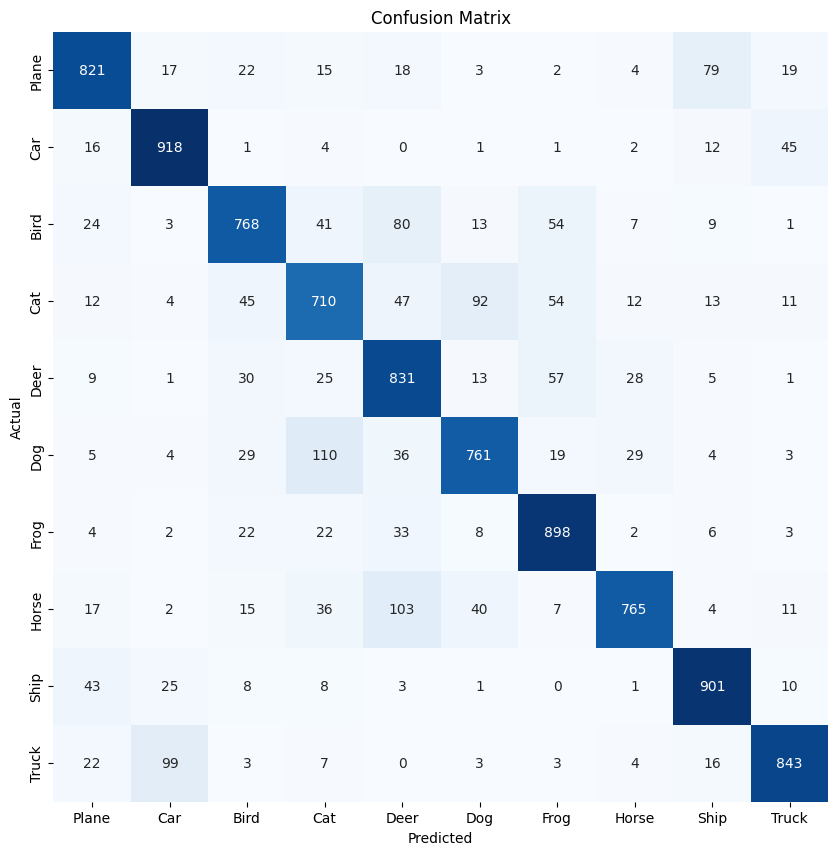

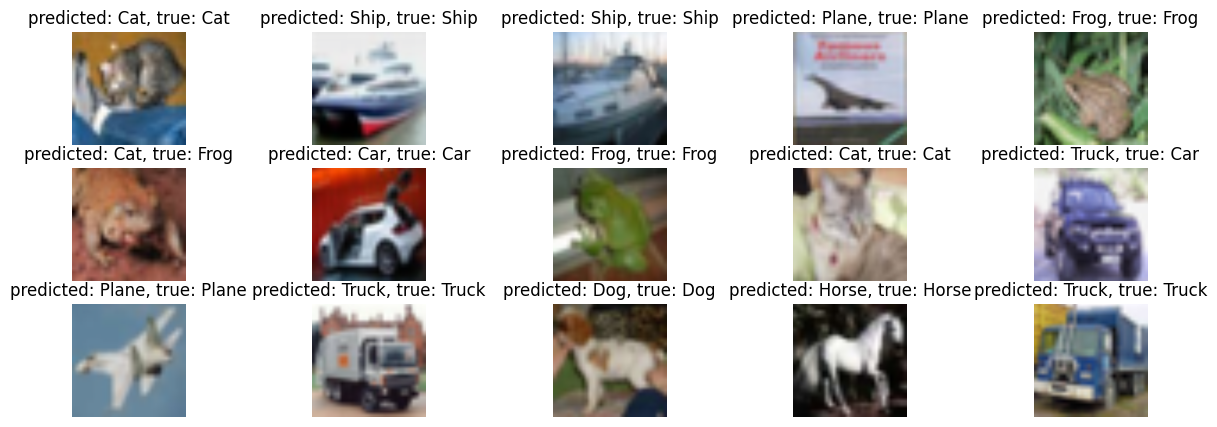

In [ ]:
# Visualizations
plot_confusion_matrix(all_labels, all_preds, classes)
visualize_predictions(trained_densenet, test_loader, classes, num_images=15)

<br>

#### **Summary**

<p align ="justify">

**Process & Implementation:**
A pre-trained DenseNet-121 was utilized, modifying its final classification layer to suit the CIFAR-10 dataset.
The convolutional base was frozen to maintain pre-learned features, and a new classifier was trained. Through training and evaluation phases, the model was fine-tuned and its performance was assessed.

**Challenges:**
Determining a suitable architecture for the new classifier and ensuring efficient training while avoiding overfitting.
Encountering and resolving issues with the training loop and evaluation phases, such as ensuring appropriate input sizes and output handling.

**Insights:**
DenseNet-121 demonstrated good performance on the CIFAR-10 dataset, with an $accuracy$ $near$ $0.81$ on the test dataset, showcasing the utility of its dense connections in transfer learning scenarios.
</p>

## **VGG-16 model on CIFAR-10 dataset**

#### **Load and explore pre-trained model**

In [ ]:
from torch.optim import lr_scheduler

# Load pre-trained VGG-16 and move it directly to GPU
model_vgg = models.vgg16(pretrained=True).to(device)

# Create a deep copy of the loaded VGG-16 model, the copy will be adjusted for our use case
model_vgg_copy = copy.deepcopy(model_vgg)

# We explore the loaded VGG-16 model
print(model_vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)

#### **Adjust pre-trained model**

In [ ]:
# Freeze the VGG-16 convolutional layers
for param in model_vgg_copy.features.parameters():
    param.requires_grad = False

In [ ]:
# Explore the loaded VGG-16 model -- We observe each layer has 'True' for 'requires_grad', meaning they are trainable.
for i, w in enumerate(model_vgg.parameters()):
    print(i, w.shape, w.requires_grad)

0
torch.Size([64, 3, 3, 3])
True

1
torch.Size([64])
True

2
torch.Size([64, 64, 3, 3])
True

3
torch.Size([64])
True

4
torch.Size([128, 64, 3, 3])
True

5
torch.Size([128])
True

6
torch.Size([128, 128, 3, 3])
True

7
torch.Size([128])
True

8
torch.Size([256, 128, 3, 3])
True

9
torch.Size([256])
True

10
torch.Size([256, 256, 3, 3])
True

11
torch.Size([256])
True

12
torch.Size([256, 256, 3, 3])
True

13
torch.Size([256])
True

14
torch.Size([512, 256, 3, 3])
True

15
torch.Size([512])
True

16
torch.Size([512, 512, 3, 3])
True

17
torch.Size([512])
True

18
torch.Size([512, 512, 3, 3])
True

19
torch.Size([512])
True

20
torch.Size([512, 512, 3, 3])
True

21
torch.Size([512])
True

22
torch.Size([512, 512, 3, 3])
True

23
torch.Size([512])
True

24
torch.Size([512, 512, 3, 3])
True

25
torch.Size([512])
True

26
torch.Size([4096, 25088])
True

27
torch.Size([4096])
True

28
torch.Size([4096, 4096])
True

29
torch.Size([4096])
True

30
torch.Size([1000, 4096])
True

31
torch.Size([1000])
True

In [ ]:
# Explore the copy of the VGG-16 model -- We observe each layer has 'False' for 'requires_grad', meaning they are not trainable anymore.
# Only the last six layers from the classifier are trainable now.
for i, w in enumerate(model_vgg_copy.parameters()):
    print(i, w.shape, w.requires_grad)

0
torch.Size([64, 3, 3, 3])
False

1
torch.Size([64])
False

2
torch.Size([64, 64, 3, 3])
False

3
torch.Size([64])
False

4
torch.Size([128, 64, 3, 3])
False

5
torch.Size([128])
False

6
torch.Size([128, 128, 3, 3])
False

7
torch.Size([128])
False

8
torch.Size([256, 128, 3, 3])
False

9
torch.Size([256])
False

10
torch.Size([256, 256, 3, 3])
False

11
torch.Size([256])
False

12
torch.Size([256, 256, 3, 3])
False

13
torch.Size([256])
False

14
torch.Size([512, 256, 3, 3])
False

15
torch.Size([512])
False

16
torch.Size([512, 512, 3, 3])
False

17
torch.Size([512])
False

18
torch.Size([512, 512, 3, 3])
False

19
torch.Size([512])
False

20
torch.Size([512, 512, 3, 3])
False

21
torch.Size([512])
False

22
torch.Size([512, 512, 3, 3])
False

23
torch.Size([512])
False

24
torch.Size([512, 512, 3, 3])
False

25
torch.Size([512])
False

26
torch.Size([4096, 25088])
True

27
torch.Size([4096])
True

28
torch.Size([4096, 4096])
True

29
torch.Size([4096])
True

30
torch.Size([1000, 4096])
True

31
torch.Size([1000])
True

In [ ]:
# Modify the classifier for CIFAR-10
num_features = model_vgg.classifier[6].in_features            # Get input size of last layer
features = list(model_vgg.classifier.children())[:-1]         # Remove last layer
features.extend([nn.Linear(num_features, len(classes))])      # Add our layer with 10 outputs
model_vgg.classifier = nn.Sequential(*features).to(device)    # Replace the model classifier

#### **Training loop**

In [ ]:
# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer_vgg = optim.SGD(model_vgg.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Decay LR by a factor of 0.1 every 7 epochs
scheduler = lr_scheduler.StepLR(optimizer_vgg, step_size=7, gamma=0.1)

In [ ]:
# Training function
def train_conv_model(model, criterion, optimizer, scheduler, num_epochs=3):
    """
    Train the model and validate it after each epoch.

    Parameters:
        model : torch.nn.Module
            The model to train.
        criterion : torch.nn.Module
            The loss function.
        optimizer : torch.optim.Optimizer
            The optimization algorithm.
        scheduler : torch.optim.lr_scheduler
            Learning rate scheduler.
        num_epochs : int, optional
            Number of training epochs (default is 25).

    Returns:
        model : torch.nn.Module
            The trained model.
    """
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)

                    # If the output is not a single scalar per sample (typical for convolutional outputs),
                    # take the mean or sum across spatial dimensions
                    if len(outputs.shape) > 2:
                        outputs = torch.mean(outputs, dim=[2, 3])

                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        print()

    return model

**Learning Note**

The training loop defined by the "*train_conv_model*" function encountered issues. First showing an accuracy near $0.0001$, ehich indicates that the model was not making accurate predictions. We thought this could be due to several reasons like a problematic model architecture, incorrect data preprocessing, too high or low learning rate, which led us to develop a debugging training loop function called "*debug_train_model*". The new function showed improved results.

In [ ]:
def debug_train_model(model, criterion, optimizer, num_epochs=3):
    model = model.to(device)
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        model.train()  # Set model to training mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            # Backward + optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}\n')

    return model

In [ ]:
# Train the Model
trained_vgg = train_conv_model(model_vgg, criterion, optimizer_vgg, scheduler, num_epochs=3)

Epoch 0/2

----------

train Loss: 12.5332 Acc: 0.0001

val Loss: 1.3346 Acc: 0.0000

Epoch 1/2

----------

train Loss: 12.5492 Acc: 0.0001

val Loss: 1.3346 Acc: 0.0000

Epoch 2/2

----------

In [ ]:
debug_vgg = debug_train_model(model_vgg, criterion, optimizer_vgg, num_epochs=3)

Epoch 0/2

----------

Train Loss: 0.4173 Acc: 0.7558

Epoch 1/2

----------

Train Loss: 0.2075 Acc: 0.8293

Epoch 2/2

----------

Train Loss: 0.1343 Acc: 0.8538

#### **Evaluation**

In [ ]:
# Evaluate the model
metrics, all_labels, all_preds = evaluate_model(debug_vgg, train_loader)
print(f"Train Loss: {metrics['loss']:.4f}")
print(f"Train Accuracy: {metrics['accuracy']:.4f}")

Train Loss: 0.0871

Train Accuracy: 0.9720

In [ ]:
# Evaluate the model
metrics, all_labels, all_preds = evaluate_model(debug_vgg, val_loader)
print(f"Validation Loss: {metrics['loss']:.4f}")
print(f"Validation Accuracy: {metrics['accuracy']:.4f}")

Validation Loss: 0.2214

Validation Accuracy: 0.9224

In [ ]:
# Evaluate the model
metrics, all_labels, all_preds = evaluate_model(debug_vgg, test_loader)
print(f"Test Loss: {metrics['loss']:.4f}")
print(f"Test Accuracy: {metrics['accuracy']:.4f}")

Test Loss: 0.2370

Test Accuracy: 0.9202

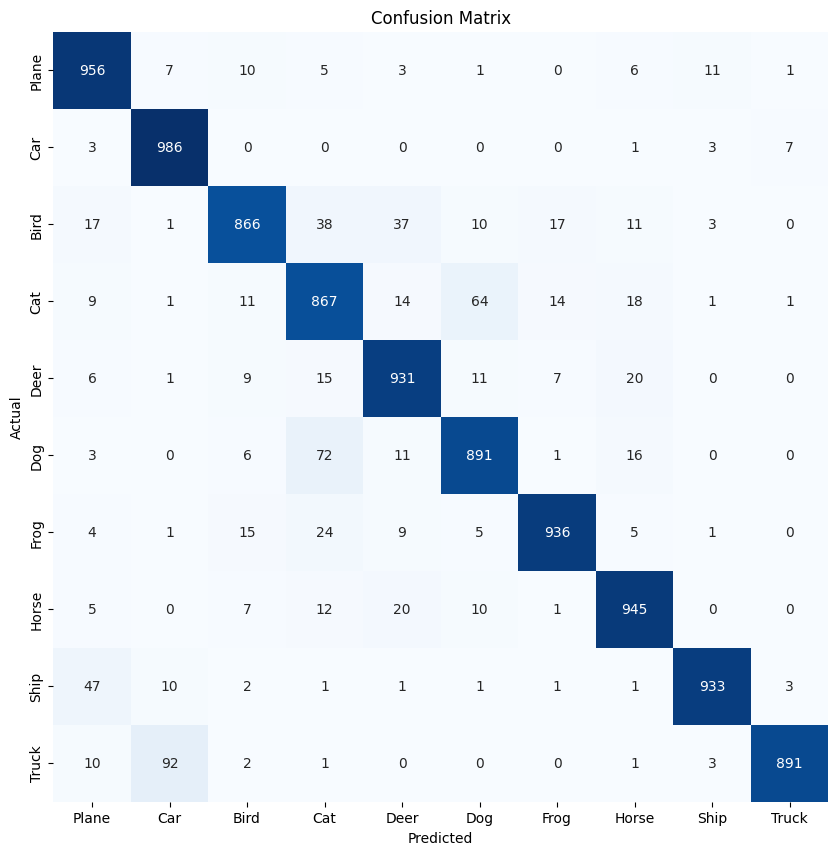

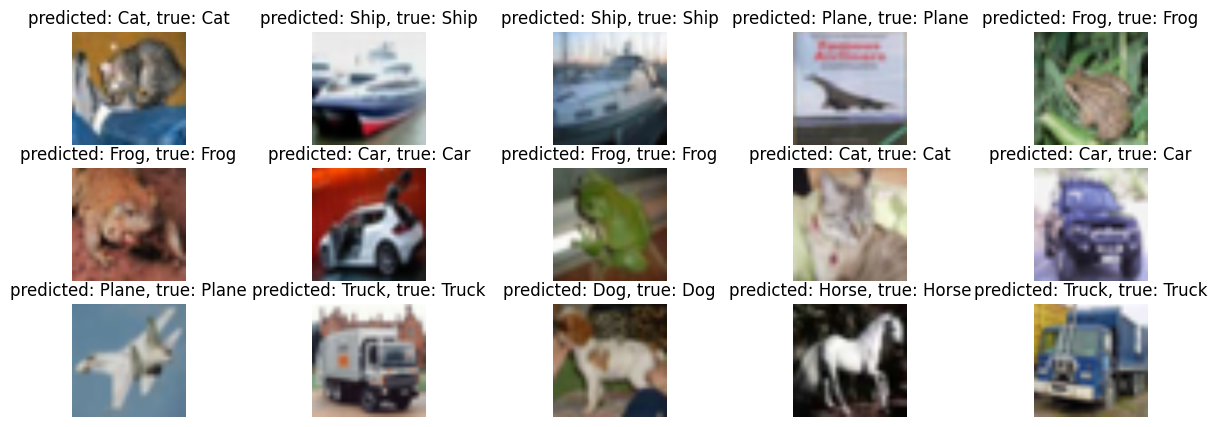

In [ ]:
# Visualizations
plot_confusion_matrix(all_labels, all_preds, classes)
visualize_predictions(debug_vgg, test_loader, classes, num_images=15)

<br>

#### **Summary**

<p align ="justify">

**Process & Implementation:**
VGG-16 was selected as the second pre-trained model, with its classifier replaced to match the target task.
Initially, a linear classifier was implemented. However, further experimentation involved a convolutional classifier.
Validation of the model’s output shapes and ensuring compatibility with the training loop were vital steps.

**Challenges:**
Adapting the training function to handle potential variations in model output dimensions (e.g., handling both 2D and 4D outputs).
Debugging and managing runtime issues, such as ensuring model and data are on the same device and managing computational resources effectively.

**Insights:**
VGG-16 demonstrated impressive performance even with a simplified training loop, highlighting its robustness as a feature extractor for various visual tasks. While slightly overtrained, it still shows great results with $accuracy$ $near$ $0.92$ on the test dataset.
The experimentation between linear and convolutional classifiers brought interesting insights into architectural considerations in transfer learning.
</p>

## **Conclusion & General Insights**

<p align ="justify">The activity demonstrated the efficacy of transfer learning, where pre-trained models (ResNet-18, DenseNet-121, and VGG-16) developed on a different dataset (ImageNet) significantly assisted in the classification task on CIFAR-10.</p>

<p align ="justify">Different models brought varied performance and training dynamics. For instance, VGG-16 showcased remarkable accuracy, suggesting its potential suitability for this type of task. Moreover, this showcases how we may be able to quickly test different pre-trained models for a particular task and dataset, and continue tuning the model that demonstrates the best initial results.</p>

<p align ="justify">Insights were gleaned regarding considerations in modifying pre-trained models, ensuring compatible architectures, and managing trainable parameters effectively to leverage pre-learned features.</p>

<p align ="justify">The process involved troubleshooting several aspects, from ensuring data and model compatibility to debugging training loops, which emphasized the importance of systematic debugging and validation at each step. If it were not for the debugging training loop, we wouldn't be able to accomplish an impressive 92% with the VGG-16 model.</p>

<p align ="justify">Finally, managing computational resources effectively, particularly when working with deep pre-trained models and sizable datasets, was a crucial aspect of the workflow. We had to manage the resources in a way that would allow us to run the whole notebook by sections, in order take advantage of Google Colab's free T4 GPUs, which are limited by usage time and sessions.</p>